<a href="https://colab.research.google.com/github/shahd1995913/deep-learning/blob/main/tenserflow_withpytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load important lIBRARY AND Read data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

# Load data
df = pd.read_csv("/content/train.csv")
print(df.shape) 
df.head(5)

(44775, 27)


,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,0,City Hotel,1,20,2017,May,21.0,24.0,2.0,0.0,...,0.0,A,A,0.0,No Deposit,87.0,0.0,Transient-Party,0.0,0.0
1,1,City Hotel,0,1,2016,March,10.0,2.0,1.0,0.0,...,0.0,A,A,0.0,No Deposit,20.0,0.0,Transient-Party,0.0,0.0
2,2,City Hotel,0,164,2015,October,40.0,2.0,1.0,0.0,...,0.0,A,D,0.0,No Deposit,19.0,0.0,Transient-Party,0.0,0.0
3,3,City Hotel,0,79,2016,July,28.0,6.0,3.0,0.0,...,0.0,D,D,1.0,No Deposit,9.0,0.0,Transient,0.0,2.0
4,4,Resort Hotel,0,16,2017,May,19.0,11.0,2.0,0.0,...,0.0,G,G,1.0,No Deposit,240.0,0.0,Transient,0.0,1.0


In [20]:
df=df.dropna()
df=df.dropna(axis=0)

# Reset index after drop
df=df.dropna().reset_index(drop=True)
df

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,0,City Hotel,1,20,2017,May,21.0,24.0,2.0,0.0,...,0.0,A,A,0.0,No Deposit,87.0,0.0,Transient-Party,0.0,0.0
1,1,City Hotel,0,1,2016,March,10.0,2.0,1.0,0.0,...,0.0,A,A,0.0,No Deposit,20.0,0.0,Transient-Party,0.0,0.0
2,2,City Hotel,0,164,2015,October,40.0,2.0,1.0,0.0,...,0.0,A,D,0.0,No Deposit,19.0,0.0,Transient-Party,0.0,0.0
3,3,City Hotel,0,79,2016,July,28.0,6.0,3.0,0.0,...,0.0,D,D,1.0,No Deposit,9.0,0.0,Transient,0.0,2.0
4,4,Resort Hotel,0,16,2017,May,19.0,11.0,2.0,0.0,...,0.0,G,G,1.0,No Deposit,240.0,0.0,Transient,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38541,44768,City Hotel,0,3,2016,February,6.0,6.0,3.0,0.0,...,0.0,D,D,0.0,No Deposit,9.0,0.0,Transient,0.0,1.0
38542,44769,Resort Hotel,0,172,2017,May,22.0,28.0,2.0,0.0,...,0.0,A,A,0.0,No Deposit,410.0,0.0,Transient,0.0,0.0
38543,44770,Resort Hotel,0,233,2016,August,32.0,1.0,2.0,0.0,...,0.0,A,A,1.0,No Deposit,240.0,0.0,Transient,0.0,1.0
38544,44772,City Hotel,1,80,2017,May,21.0,21.0,2.0,0.0,...,0.0,D,D,0.0,No Deposit,27.0,0.0,Transient,0.0,0.0


In [21]:
df_features = df.copy()
df_labels = df_features.pop('is_canceled')
df_features

,Unnamed: 0,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,0,City Hotel,20,2017,May,21.0,24.0,2.0,0.0,0.0,...,0.0,A,A,0.0,No Deposit,87.0,0.0,Transient-Party,0.0,0.0
1,1,City Hotel,1,2016,March,10.0,2.0,1.0,0.0,0.0,...,0.0,A,A,0.0,No Deposit,20.0,0.0,Transient-Party,0.0,0.0
2,2,City Hotel,164,2015,October,40.0,2.0,1.0,0.0,0.0,...,0.0,A,D,0.0,No Deposit,19.0,0.0,Transient-Party,0.0,0.0
3,3,City Hotel,79,2016,July,28.0,6.0,3.0,0.0,0.0,...,0.0,D,D,1.0,No Deposit,9.0,0.0,Transient,0.0,2.0
4,4,Resort Hotel,16,2017,May,19.0,11.0,2.0,0.0,0.0,...,0.0,G,G,1.0,No Deposit,240.0,0.0,Transient,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38541,44768,City Hotel,3,2016,February,6.0,6.0,3.0,0.0,0.0,...,0.0,D,D,0.0,No Deposit,9.0,0.0,Transient,0.0,1.0
38542,44769,Resort Hotel,172,2017,May,22.0,28.0,2.0,0.0,0.0,...,0.0,A,A,0.0,No Deposit,410.0,0.0,Transient,0.0,0.0
38543,44770,Resort Hotel,233,2016,August,32.0,1.0,2.0,0.0,0.0,...,0.0,A,A,1.0,No Deposit,240.0,0.0,Transient,0.0,1.0
38544,44772,City Hotel,80,2017,May,21.0,21.0,2.0,0.0,0.0,...,0.0,D,D,0.0,No Deposit,27.0,0.0,Transient,0.0,0.0


In [22]:
df_features['arrival_date_month'] = pd.factorize(df_features['arrival_date_month'])[0]
df_features['hotel'] = pd.factorize(df_features['hotel'])[0]
df_features['arrival_date_year'] = pd.factorize(df_features['arrival_date_year'])[0]
df_features['customer_type'] = pd.factorize(df_features['customer_type'])[0]
df_features['deposit_type'] = pd.factorize(df_features['deposit_type'])[0]
df_features['assigned_room_type'] = pd.factorize(df_features['assigned_room_type'])[0]
df_features['reserved_room_type'] = pd.factorize(df_features['reserved_room_type'])[0]
df_features['country'] = pd.factorize(df_features['country'])[0]
df_features['meal'] = pd.factorize(df_features['meal'])[0]
df_features['market_segment'] = pd.factorize(df_features['market_segment'])[0]
df_features['distribution_channel'] = pd.factorize(df_features['distribution_channel'])[0]

In [23]:
# Drop the columns with weak relationship with the label class
df_features= df_features.drop(columns = 'Unnamed: 0', axis = 1)
df_features = df_features.drop(columns = 'children', axis = 1)
df_features = df_features.drop(columns = 'arrival_date_day_of_month', axis = 1)
df_features= df_features.drop(columns = 'arrival_date_week_number', axis = 1)
df_features = df_features.drop(columns = 'arrival_date_year', axis = 1)
df_features= df_features.drop(columns = 'days_in_waiting_list', axis = 1)
df_features = df_features.drop(columns = 'previous_bookings_not_canceled', axis = 1)
df_features = df_features.drop(columns = 'reserved_room_type', axis = 1)
df_features= df_features.drop(columns = 'arrival_date_month', axis = 1)
df_features = df_features.drop(columns = 'meal', axis = 1)
df_features = df_features.drop(columns = 'babies', axis = 1)


In [24]:
df_features

,hotel,lead_time,adults,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,assigned_room_type,booking_changes,deposit_type,agent,customer_type,required_car_parking_spaces,total_of_special_requests
0,0,20,2.0,0,0,0,0.0,0.0,0,0.0,0,87.0,0,0.0,0.0
1,0,1,1.0,1,1,0,0.0,0.0,0,0.0,0,20.0,0,0.0,0.0
2,0,164,1.0,0,1,0,0.0,0.0,1,0.0,0,19.0,0,0.0,0.0
3,0,79,3.0,0,2,0,0.0,0.0,1,1.0,0,9.0,1,0.0,2.0
4,1,16,2.0,2,2,0,0.0,0.0,2,1.0,0,240.0,1,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38541,0,3,3.0,0,2,0,0.0,0.0,1,0.0,0,9.0,1,0.0,1.0
38542,1,172,2.0,18,1,0,0.0,0.0,0,0.0,0,410.0,1,0.0,0.0
38543,1,233,2.0,61,2,0,0.0,0.0,0,1.0,0,240.0,1,0.0,1.0
38544,0,80,2.0,0,1,0,0.0,0.0,1,0.0,0,27.0,1,0.0,0.0


In [25]:
df_features = np.array(df_features)
df_features

array([[  0.,  20.,   2., ...,   0.,   0.,   0.],
       [  0.,   1.,   1., ...,   0.,   0.,   0.],
       [  0., 164.,   1., ...,   0.,   0.,   0.],
       ...,
       [  1., 233.,   2., ...,   1.,   0.,   1.],
       [  0.,  80.,   2., ...,   1.,   0.,   0.],
       [  0.,  18.,   1., ...,   1.,   0.,   1.]])

In [28]:
normalize = layers.Normalization()

In [29]:
normalize.adapt(df_features)

In [69]:
import tensorflow as tf
from tensorflow.keras import layers

norm_abalone_model = tf.keras.Sequential([
  normalize,
  layers.Dense(64),
  layers.Dense(1)
])

# norm_abalone_model.compile(optimizer='sgd',
#               loss='mse',
#               metrics=[tf.keras.metrics.Accuracy()])

norm_abalone_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                            optimizer = tf.keras.optimizers.Adam(),
                            # n_classes = 2,
                             metrics=[tf.keras.metrics.Accuracy()])

norm_abalone_model.fit(df_features, df_labels, epochs=10 ,  verbose=1)

Epoch 1/10
1205/1205 [==============================] - 2s 1ms/step - loss: 0.1812 - accuracy: 0.0000e+00
Epoch 2/10
1205/1205 [==============================] - 2s 1ms/step - loss: 0.1755 - accuracy: 0.0000e+00
Epoch 3/10
1205/1205 [==============================] - 2s 1ms/step - loss: 0.1721 - accuracy: 0.0000e+00
Epoch 4/10
1205/1205 [==============================] - 1s 1ms/step - loss: 0.1728 - accuracy: 2.5943e-05
Epoch 5/10
1205/1205 [==============================] - 1s 1ms/step - loss: 0.1720 - accuracy: 0.0000e+00
Epoch 6/10
1205/1205 [==============================] - 1s 1ms/step - loss: 0.1712 - accuracy: 0.0000e+00
Epoch 7/10
1205/1205 [==============================] - 2s 1ms/step - loss: 0.1710 - accuracy: 0.0000e+00
Epoch 8/10
1205/1205 [==============================] - 2s 2ms/step - loss: 0.1707 - accuracy: 0.0000e+00
Epoch 9/10
1205/1205 [==============================] - 2s 1ms/step - loss: 0.1707 - accuracy: 0.0000e+00
Epoch 10/10
1205/1205 [=======================

In [63]:
# test data
# Load data
df_test = pd.read_csv("/content/test.csv")
print(df_test.shape) 
df_test.head(5)

(16675, 26)


,Unnamed: 0,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,0,City Hotel,433,2016,September,38,15,2,0.0,0,...,0,A,A,0,Non Refund,1.0,0,Transient,0,0
1,1,City Hotel,18,2015,September,37,7,2,0.0,0,...,0,A,A,0,No Deposit,9.0,0,Contract,0,1
2,2,City Hotel,63,2016,September,36,2,2,1.0,0,...,0,A,A,0,No Deposit,9.0,0,Transient,0,0
3,3,City Hotel,275,2016,June,23,4,2,0.0,0,...,0,A,A,0,Non Refund,5.0,69,Transient,0,0
4,4,Resort Hotel,260,2016,September,39,21,1,0.0,0,...,0,D,D,2,No Deposit,240.0,0,Transient,0,1


In [64]:

df_test['arrival_date_month'] = pd.factorize(df_test['arrival_date_month'])[0]
df_test['hotel'] = pd.factorize(df_test['hotel'])[0]
df_test['arrival_date_year'] = pd.factorize(df_test['arrival_date_year'])[0]
df_test['customer_type'] = pd.factorize(df_test['customer_type'])[0]
df_test['deposit_type'] = pd.factorize(df_test['deposit_type'])[0]
df_test['assigned_room_type'] = pd.factorize(df_test['assigned_room_type'])[0]
df_test['reserved_room_type'] = pd.factorize(df_test['reserved_room_type'])[0]
df_test['country'] = pd.factorize(df_test['country'])[0]
df_test['meal'] = pd.factorize(df_test['meal'])[0]
df_test['market_segment'] = pd.factorize(df_test['market_segment'])[0]
df_test['distribution_channel'] = pd.factorize(df_test['distribution_channel'])[0]


# Drop the columns with weak relationship with the label class
# df_test= df_test.drop(columns = 'Unnamed: 0', axis = 1)
df_test = df_test.drop(columns = 'children', axis = 1)
df_test = df_test.drop(columns = 'arrival_date_day_of_month', axis = 1)
df_test= df_test.drop(columns = 'arrival_date_week_number', axis = 1)
df_test = df_test.drop(columns = 'arrival_date_year', axis = 1)
df_test= df_test.drop(columns = 'days_in_waiting_list', axis = 1)
df_test = df_test.drop(columns = 'previous_bookings_not_canceled', axis = 1)
df_test = df_test.drop(columns = 'reserved_room_type', axis = 1)
df_test= df_test.drop(columns = 'arrival_date_month', axis = 1)
df_test = df_test.drop(columns = 'meal', axis = 1)
df_test = df_test.drop(columns = 'babies', axis = 1)


In [77]:
predictions = norm_abalone_model.predict(features)
# print(predictions)
# Generate arg maxes for predictions
classes = np.argmax(predictions, axis = 1)
print(classes)

522/522 [==============================] - 0s 884us/step
[0 0 0 ... 0 0 0]


In [78]:
features = df_test.drop(['Unnamed: 0'],axis = 1)
pred = norm_abalone_model.predict(features)
s = pd.DataFrame(classes)
idd = df_test[['Unnamed: 0']]
idd['is_canceled'] = s
s.value_counts()
idd.to_csv('submissiontf.csv', index=False)

522/522 [==============================] - 0s 923us/step


In [34]:
test_results = {}

test_results['model'] = norm_abalone_model.evaluate(
  df_features, df_labels, verbose=0)

print(f" Accuracy: {test_results}")

 Accuracy: {'model': [0.1693698614835739, 0.0]}


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import the models 
from sklearn.model_selection import train_test_split, GridSearchCV


In [49]:
df=df.dropna()
df=df.dropna(axis=0)

# Reset index after drop
df=df.dropna().reset_index(drop=True)
df
X = df.drop('is_canceled',axis=1)
y = df['is_canceled']


df['arrival_date_month'] = pd.factorize(df['arrival_date_month'])[0]
df['hotel'] = pd.factorize(df['hotel'])[0]
df['arrival_date_year'] = pd.factorize(df['arrival_date_year'])[0]
df['customer_type'] = pd.factorize(df['customer_type'])[0]
df['deposit_type'] = pd.factorize(df['deposit_type'])[0]
df['assigned_room_type'] = pd.factorize(df['assigned_room_type'])[0]
df['reserved_room_type'] = pd.factorize(df['reserved_room_type'])[0]
df['country'] = pd.factorize(df['country'])[0]
df['meal'] = pd.factorize(df['meal'])[0]
df['market_segment'] = pd.factorize(df['market_segment'])[0]
df['distribution_channel'] = pd.factorize(df['distribution_channel'])[0]


# Drop the columns with weak relationship with the label class
df= df.drop(columns = 'Unnamed: 0', axis = 1)
df = df.drop(columns = 'children', axis = 1)
df = df.drop(columns = 'arrival_date_day_of_month', axis = 1)
df= df.drop(columns = 'arrival_date_week_number', axis = 1)
df = df.drop(columns = 'arrival_date_year', axis = 1)
df= df.drop(columns = 'days_in_waiting_list', axis = 1)
df = df.drop(columns = 'previous_bookings_not_canceled', axis = 1)
df = df.drop(columns = 'reserved_room_type', axis = 1)
df= df.drop(columns = 'arrival_date_month', axis = 1)
df = df.drop(columns = 'meal', axis = 1)
df = df.drop(columns = 'babies', axis = 1)

KeyError: ignored

In [40]:
# Import Libraries
import torch
import torch.nn as nn
from torch.autograd import Variable

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [51]:
X_train = torch.from_numpy(X_train.to_numpy()).float()
y_train = torch.squeeze(torch.from_numpy(y_train.to_numpy()).float())
X_test = torch.from_numpy(X_test.to_numpy()).float()
y_test = torch.squeeze(torch.from_numpy(y_test.to_numpy()).float())
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([30836, 15]) torch.Size([30836])
torch.Size([7710, 15]) torch.Size([7710])


In [52]:
class Net(nn.Module):
  def __init__(self, n_features):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(n_features, 5)
    self.fc2 = nn.Linear(5, 3)
    self.fc3 = nn.Linear(3, 1)
 
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    return torch.sigmoid(self.fc3(x))
net = Net(X_train.shape[1])

In [58]:
from sklearn.metrics import confusion_matrix, classification_report
from torch import nn, optim
import torch.nn.functional as F
criterion = nn.BCELoss(size_average=True)
# 
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [59]:
def calculate_accuracy(y_true, y_pred):
  predicted = y_pred.ge(.5).view(-1)
  return (y_true == predicted).sum().float() / len(y_true)

In [60]:
def round_tensor(t, decimal_places=3):
  return round(t.item(), decimal_places)
for epoch in range(1000):
    y_pred = net(X_train)
    y_pred = torch.squeeze(y_pred)
    train_loss = criterion(y_pred, y_train)
    if epoch % 100 == 0:
      train_acc = calculate_accuracy(y_train, y_pred)
      y_test_pred = net(X_test)
      y_test_pred = torch.squeeze(y_test_pred)
      test_loss = criterion(y_test_pred, y_test)
      test_acc = calculate_accuracy(y_test, y_test_pred)
      print(
f'''epoch {epoch}
Train set - loss: {round_tensor(train_loss)}, accuracy: {round_tensor(train_acc)}
Test  set - loss: {round_tensor(test_loss)}, accuracy: {round_tensor(test_acc)}
''')
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

epoch 0
Train set - loss: 15.982, accuracy: 0.61
Test  set - loss: 15.987, accuracy: 0.61

epoch 100
Train set - loss: 0.98, accuracy: 0.611
Test  set - loss: 0.986, accuracy: 0.611

epoch 200
Train set - loss: 0.642, accuracy: 0.615
Test  set - loss: 0.643, accuracy: 0.623

epoch 300
Train set - loss: 0.629, accuracy: 0.612
Test  set - loss: 0.628, accuracy: 0.621

epoch 400
Train set - loss: 0.621, accuracy: 0.63
Test  set - loss: 0.619, accuracy: 0.636

epoch 500
Train set - loss: 0.61, accuracy: 0.668
Test  set - loss: 0.607, accuracy: 0.676

epoch 600
Train set - loss: 0.604, accuracy: 0.68
Test  set - loss: 0.601, accuracy: 0.683

epoch 700
Train set - loss: 0.599, accuracy: 0.694
Test  set - loss: 0.595, accuracy: 0.698

epoch 800
Train set - loss: 0.59, accuracy: 0.719
Test  set - loss: 0.587, accuracy: 0.72

epoch 900
Train set - loss: 0.576, accuracy: 0.736
Test  set - loss: 0.574, accuracy: 0.737



In [61]:
classes = ['No canceled', 'canceled']
y_pred = net(X_test)
y_pred = y_pred.ge(.5).view(-1).cpu()
y_test = y_test.cpu()
print(classification_report(y_test, y_pred, target_names=classes))

              precision    recall  f1-score   support

 No canceled       0.71      0.98      0.82      4705
    canceled       0.94      0.37      0.53      3005

    accuracy                           0.74      7710
   macro avg       0.82      0.68      0.68      7710
weighted avg       0.80      0.74      0.71      7710



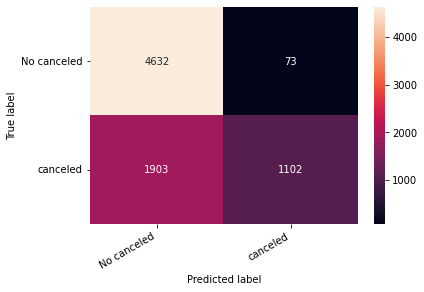

In [62]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
hmap = sns.heatmap(df_cm, annot=True, fmt="d")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True label');
plt.xlabel('Predicted label');

In [ ]:
data=nn.DataParallel(features) 
s = pd.DataFrame(classes)
idd = df_test[['Unnamed: 0']]
idd['is_canceled'] = s
s.value_counts()
idd.to_csv('submissionPytorch.csv', index=False)